<a href="https://colab.research.google.com/github/vedants556/Collabs/blob/main/DL_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Vedant Shelar
22102A0027
DEEP LEARNING LAB 3

 Problem Statement 1:

Title: Convergence Analysis of Optimizers on a Convex Quadratic Loss Surface

Objective:
Implement a 2D convex quadratic loss function L(w)=w12+2w2​ and visualize the optimizer trajectories for SGD, Momentum, and Adam. Compare their convergence rates and plot the paths on the contour map of the loss function.

#  1. IMPORTS & CONFIGURATION


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.colors as colors


# Make plots larger in Colab

In [5]:
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["font.size"] = 14

# 2D quadratic loss and its gradient

In [6]:
def loss_and_grad(w):
    # w: array-like of shape (2,)
    # L = w1^2 + 2*w2^2
    L = w[0] ** 2 + 2.0 * w[1] ** 2
    grad = np.array([2.0 * w[0], 4.0 * w[1]])
    return L, grad

# Generic optimizer runner

In [7]:
def run_opt(optimizer_name, w0, **kwargs):
    w = w0.copy().astype(float)
    path = [w.copy()]
    losses = []
    if optimizer_name == "sgd":
        lr = kwargs.get("lr", 0.1)
        for t in range(kwargs["steps"]):
            L, g = loss_and_grad(w)
            w = w - lr * g
            path.append(w.copy()); losses.append(L)
        return np.array(path), np.array(losses)

    elif optimizer_name == "momentum":
        lr = kwargs.get("lr", 0.05)
        beta = kwargs.get("beta", 0.9)
        v = np.zeros_like(w)
        for t in range(kwargs["steps"]):
            L, g = loss_and_grad(w)
            v = beta * v - lr * g
            w = w + v
            path.append(w.copy()); losses.append(L)
        return np.array(path), np.array(losses)

    elif optimizer_name == "adam":
        lr = kwargs.get("lr", 0.05)
        beta1 = kwargs.get("beta1", 0.9)
        beta2 = kwargs.get("beta2", 0.999)
        eps = kwargs.get("eps", 1e-8)
        m = np.zeros_like(w)
        v = np.zeros_like(w)
        path = [w.copy()]
        losses = []
        for t in range(1, kwargs["steps"] + 1):
            L, g = loss_and_grad(w)
            m = beta1 * m + (1 - beta1) * g
            v = beta2 * v + (1 - beta2) * (g ** 2)
            m_hat = m / (1 - beta1 ** t)
            v_hat = v / (1 - beta2 ** t)
            w = w - lr * m_hat / (np.sqrt(v_hat) + eps)
            path.append(w.copy()); losses.append(L)
        return np.array(path), np.array(losses)

    else:
        raise ValueError(f"Unknown optimizer {optimizer_name}")


#  2. RUN OPTIMIZERS

In [8]:
# Common settings
steps = 200
initial = np.array([4.0, 3.0])

path_sgd, losses_sgd     = run_opt("sgd",      initial, steps=steps, lr=0.1)
path_mom, losses_mom     = run_opt("momentum", initial, steps=steps, lr=0.05, beta=0.9)
path_adam, losses_adam   = run_opt("adam",     initial, steps=steps, lr=0.05, beta1=0.9, beta2=0.999, eps=1e-8)



#  3. CONTOUR + TRAJECTORY PLOT

# Grid for contour plotting

(np.float64(-5.0), np.float64(5.0), np.float64(-5.0), np.float64(5.0))

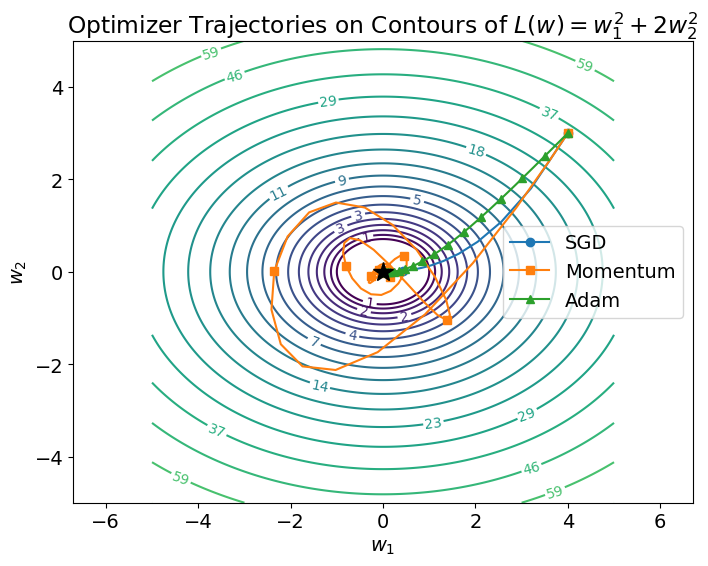

In [11]:
grid = np.linspace(-5, 5, 400)
X, Y = np.meshgrid(grid, grid)
Z = X**2 + 2 * Y**2

fig, ax = plt.subplots()
levels = np.logspace(0, 2.5, 25)
cs = ax.contour(
    X, Y, Z,
    levels=levels,
    norm=colors.LogNorm(),
    cmap="viridis",
)
ax.clabel(cs, fmt="%.0f", fontsize=10)
ax.plot(path_sgd[:,0],  path_sgd[:,1],  "o-", label="SGD",     markevery=10)
ax.plot(path_mom[:,0],  path_mom[:,1],  "s-", label="Momentum",markevery=10)
ax.plot(path_adam[:,0], path_adam[:,1], "^-", label="Adam",    markevery=10)
ax.plot(0, 0, "k*", markersize=15)
ax.set_xlabel("$w_1$"); ax.set_ylabel("$w_2$")
ax.set_title("Optimizer Trajectories on Contours of $L(w)=w_1^2+2w_2^2$")
ax.legend(); ax.axis("equal")


#  4. LOSS VS ITERATION

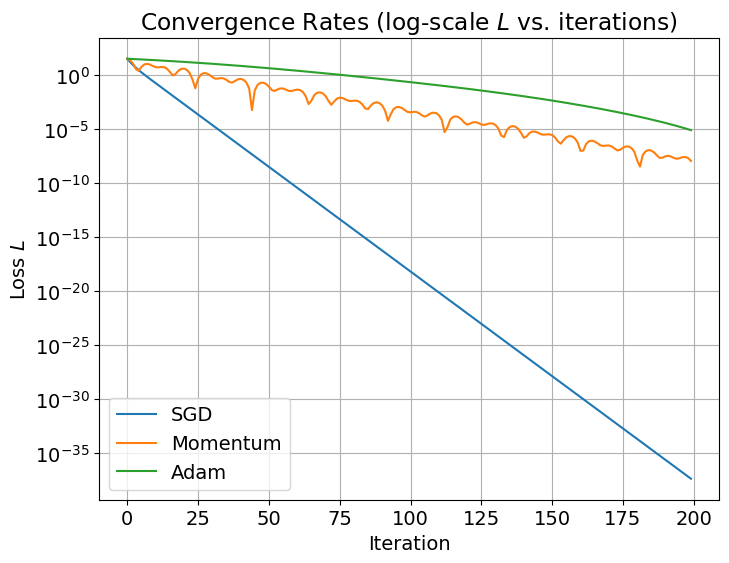

In [12]:
fig, ax = plt.subplots()
ax.semilogy(losses_sgd,  label="SGD")
ax.semilogy(losses_mom,  label="Momentum")
ax.semilogy(losses_adam, label="Adam")
ax.set_xlabel("Iteration"); ax.set_ylabel("Loss $L$")
ax.set_title("Convergence Rates (log‑scale $L$ vs. iterations)")
ax.legend(); ax.grid(True)
plt.show()